<a href="https://colab.research.google.com/github/ahzaidy/Programs/blob/main/CPSC_5440_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
KNN Accuracy: 73.85%
SVM Accuracy: 66.22%
MLP Accuracy: 76.69%


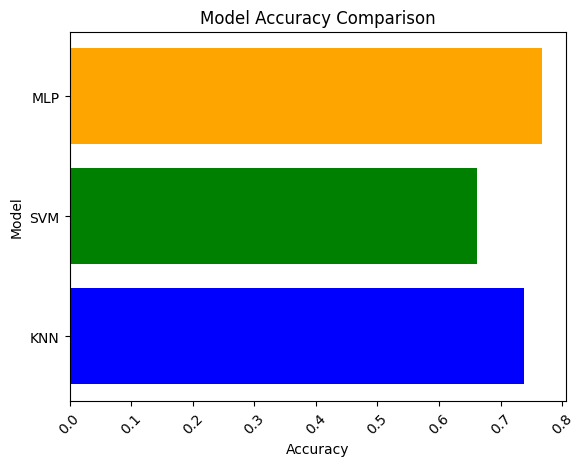

In [ ]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Load word files with encoding

def load_words(file_path, encoding="utf-8"):
    with open(file_path, 'r', encoding=encoding) as file:
        return [line.replace('\n', ' ') for line in file.readlines()]

engl_words = load_words('/content/drive/My Drive/english.txt')
grmn_words = load_words('/content/drive/My Drive/german.txt', encoding="latin1")
span_words = load_words('/content/drive/My Drive/spanish.txt')

# Filter only 5-letter words
def fltr_five_lttr_wrds(word_list):
    return [word for word in word_list if len(word) == 5]

engl_words = fltr_five_lttr_wrds(engl_words)
grmn_words = fltr_five_lttr_wrds(grmn_words)
span_words = fltr_five_lttr_wrds(span_words)

# Assign labels: English = 0, German = 1, Spanish = 2
engl_lbls = [0] * len(engl_words)
grmn_lbls = [1] * len(grmn_words)
span_lbls = [2] * len(span_words)

# Combine datasets
all_words = engl_words + grmn_words + span_words
all_labels = engl_lbls + grmn_lbls + span_lbls

# Convert words to numerical features using language-specific mappings
def crt_chr_mapng(language):
    if language == "english":
        alphabet = 'abcdefghijklmnopqrstuvwxyz'
    elif language == "german":
        alphabet = 'abcdefghijklmnopqrstuvwxyzäöüß'
    elif language == "spanish":
        alphabet = 'abcdefghijklmnopqrstuvwxyzáéíóúüñ'
    else:
        raise ValueError("Unsupported language")

    mapping = {}
    for idx, char in enumerate(alphabet, start=1):
        mapping[char] = idx
    return mapping

engl_mapng = crt_chr_mapng("english")
grmn_mapng = crt_chr_mapng("german")
span_mapng = crt_chr_mapng("spanish")

def word_to_features(word, language):
    if language == 0:
        mapping = engl_mapng
    elif language == 1:
        mapping = grmn_mapng
    elif language == 2:
        mapping = span_mapng
    else:
        raise ValueError("Unsupported language label")

    return [mapping.get(char.lower(), 0) for char in word]

features = []
for word, label in zip(all_words, all_labels):
    features.append(word_to_features(word, label))

# Create a DataFrame for features and labels
data = pd.DataFrame(features)
data['label'] = all_labels

# Pad sequences to ensure uniform length
max_length = data.shape[1] - 1
data = data.apply(lambda row: row.fillna(0), axis=1)

# Split data into training and testing sets
X = data.iloc[:, :-1]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train and evaluate models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='linear', probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

# Plot results with colorful bars
colors = ['blue', 'green', 'orange']
plt.barh(list(results.keys()), list(results.values()), color=colors)
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()